# 9 Support Vector Machines

## 9.1 Maximal Margin Classifier

### 9.1.1 What Is a Hyperplane?

The mathematical definition of a hyperplane in 2D space
\begin{align}\tag{9.1}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 = 0\mathrm{.}
\end{align}
Basically, it is a line. Equation 9.1 can be easily extended to th $p$-dimensional setting:
\begin{align}\tag{9.2}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p = 0
\end{align}
What we are interested in is where do points exist in relation to this hyperplane:
\begin{align}\tag{9.3}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p > 0\mathrm{,}
\end{align}
defines one side of the hyperplane, and
\begin{align}\tag{9.3}
\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p < 0\mathrm{,}
\end{align}
defines the other side of the hyperplane. In this sense the hyperplane acts as a classification marker as to what region a point $(X_1, X_2, \ldots, X_p)^T$ lies.

---

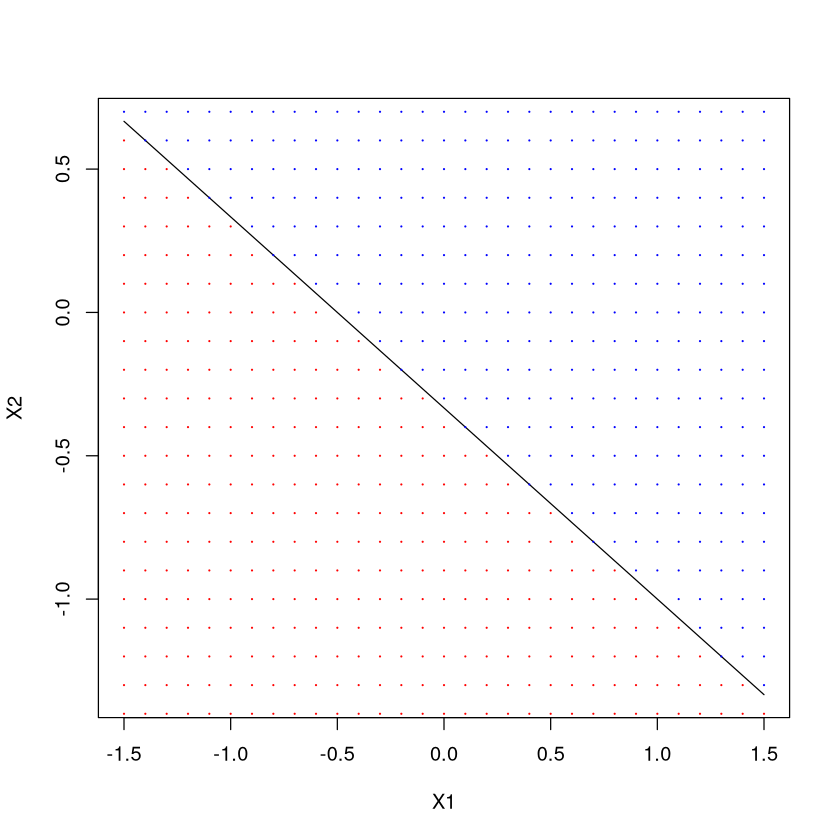

In [1]:
x <- seq(-1.5,1.5,by=.1)
hyper <- function(x) -(1 + 2*x)/3
plot(x, hyper(x), type="l", xlab="X1", ylab="X2")
X1 = c()
X2 = c()
for (x1 in x) {
    for (x2 in x) {
        X1 = c(X1, x1)
        X2 = c(X2, x2)
    }
}
color <- "red"
color[X2>hyper(X1)] <- "blue"
color[X2<hyper(X1)] <- "red"
points(X1, X2, col=color, cex=.1)
rm(list=ls())

__FIGURE 9.1__. The hyperplane $1 + 2X_1 + 3X_2 = 0$ is shown. The blue region is the set of points for which $1 + 2X_1 + 3X_2 > 0$, and the red is the set of points for which $1 + 2X_1 + 3X_2 < 0$.

---

### 9.1.2 Classification Using a Separating Hyperplane

Suppose we have a $n \times p$ data matrix $X$ that consists of $n$ training observations in $p$-dimensional space,
\begin{align}\tag{9.5}
x_1 = 
\begin{pmatrix}
x_{11} \\
\vdots \\
x_{1p}
\end{pmatrix}\mathrm{,}
\cdots \mathrm{,} x_n =
\begin{pmatrix}
x_{n1} \\
\vdots \\
x_{np}
\end{pmatrix} \mathrm{,}
\end{align}
and that these observations fall into two classes&mdash;that is, $y_1,\ldots,y_n \in \{-1, 1\}$ where $-1$ represents one class and $1$ the other class.  

We also have test observations, a $p$-vector of observed features $x^* = (x_1^* \ \ \ldots \ \ x_p^*)^T$. Our goal is to develop a classifier based on the training data that will correctly classify the test observation using its feature measurements. Our classifier will be based on the concept of a _separating hyperplane_.

---

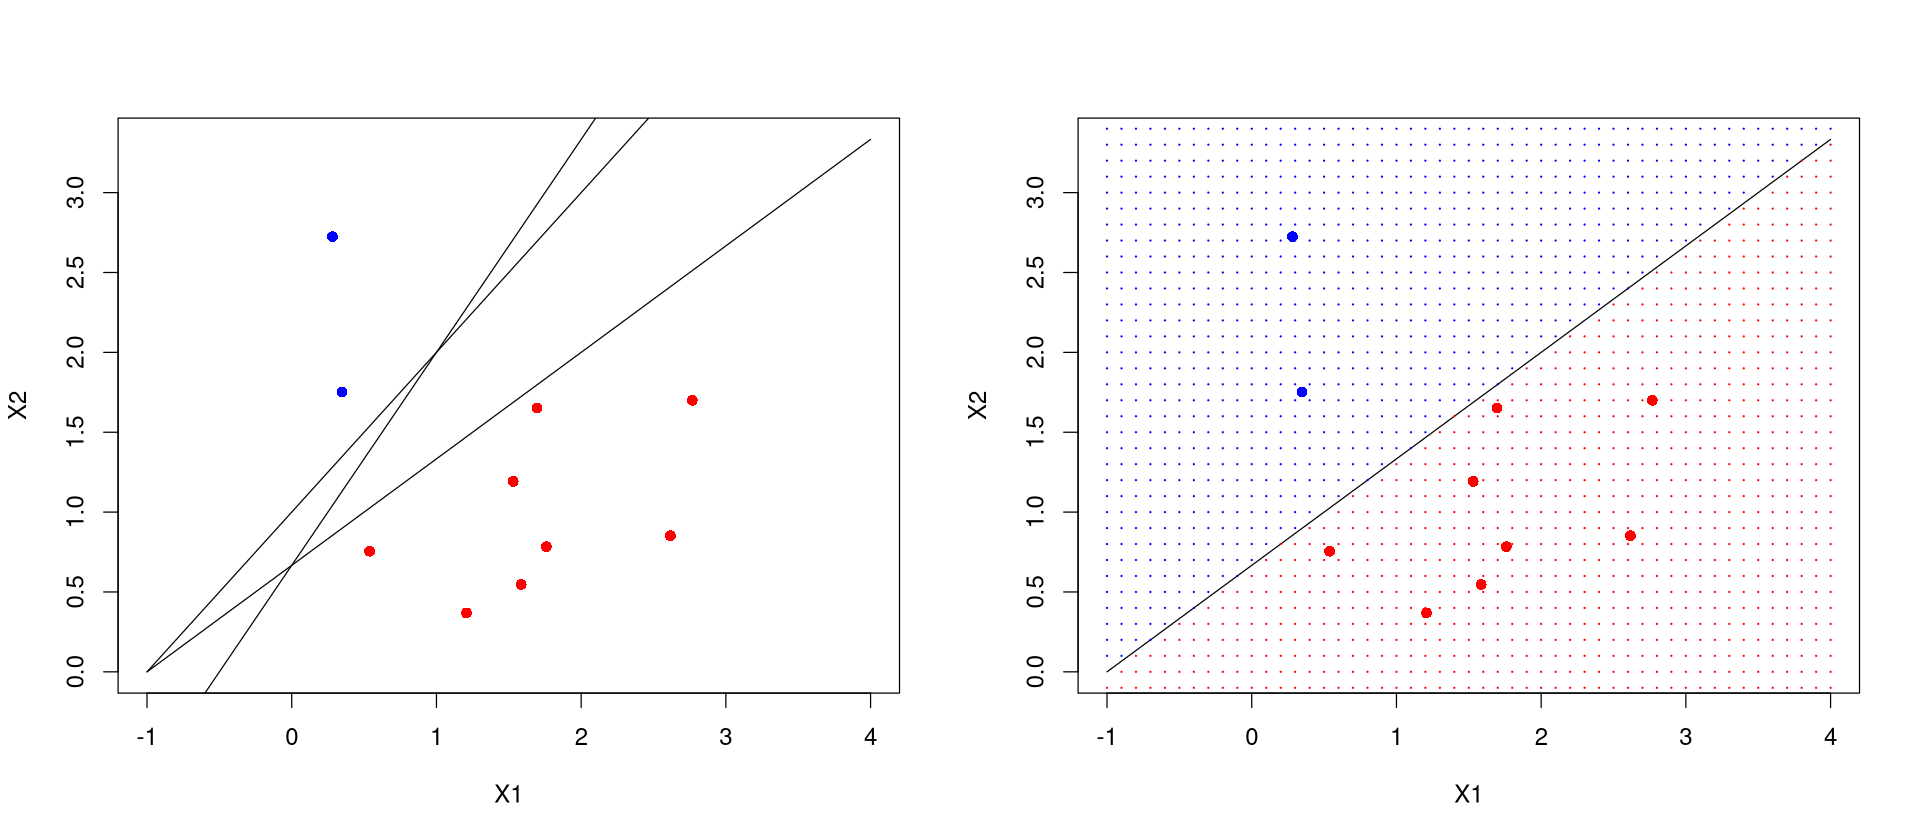

In [2]:
set.seed(3)
par(mfrow = c(1, 2), cex=1.2)
options(repr.plot.width=16, repr.plot.height=7)
x <- seq(-1,4,by=.1)
hyper1 <- function(x) (2 + 2*x)/3
hyper2 <- function(x) (3 + 3*x)/3
hyper3 <- function(x) (2 + 4*x)/3
xn <- 1.5 + rnorm(10)
yn <- 1.5 + rnorm(10)
plot(x, hyper1(x), type="l", xlab="X1", ylab="X2")
lines(x, hyper2(x), xlab="X1", ylab="X2")
color.1 <- "red"
color.1[ yn > hyper1(xn) ] <- "blue"
color.1[ yn < hyper1(xn) ] <- "red"
points(xn, yn, pch=16, col=color.1)
lines(x, hyper3(x), xlab="X1", ylab="X2")
plot(x, hyper1(x), type="l", xlab="X1", ylab="X2")
X1 = c()
X2 = c()
for (x1 in x) {
    for (x2 in x) {
        X1 = c(X1, x1)
        X2 = c(X2, x2)
    }
}
color <- "red"
color[X2>hyper1(X1)] <- "blue"
color[X2<hyper1(X1)] <- "red"
points(X1, X2, col=color, cex=.1)
points(xn, yn, pch=16, col=color.1)
options(repr.plot.width=7, repr.plot.height=7)
rm(list=ls())

__FIGURE 9.2__. Left: There are two classes of observations, shown in blue and in red, each of which has measurements on two variables. Three separating hyperplanes, out of many  possible, are shown in black. Right: A separating hyperplane is shown in black. The blue and red grid indicates the decision rule made by a classifier based on this separating hyperplane: a test observation that falls in the blue portion of the grid will be assigned to the blue class, and a test observation that falls into the red portion of the grid will be assigned to the purple class.

---

The figure on the left show three hyperplanes that separate the training observations perfectly according to their class labels. We label the observations from the blue calss as $y_i=1$ and those from the red class as $y_i=-1$. Then a separating hyperplane has the property that
\begin{align}\tag{9.6}
\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} > 0 \ \ \mathrm{if} \ \ y_i = 1\mathrm{,}
\end{align}
and
\begin{align}\tag{9.7}
\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} > 0 \ \ \mathrm{if} \ \ y_i = 1\mathrm{.}
\end{align}
Equivalently, a separating hyperplane has the property that
\begin{align}\tag{9.8}
y_i(\beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip}) > 0
\end{align}
for all $i = 1,\ldots,n$.  

If a separating hyperplane exists, then we use it as a classifier: a test observation is assigned a class depending on which side of the hyperplane it is located. The right hand side of Figure 9.2 shows one such hyperplane classifier.

We classify the test observation $x^*$ based on the sign of $f(x^*) = \beta_0 + \beta_1 x_1^* + \beta_2 x_2^* + \cdots + \beta_p x_p^*$. If $f(x^*)$ is positive, then we assign the test observation to class $1$, and if $f(x^*)$ is negative, then we assign it to class $-1$. The _magnitude of_ $f(x^*)$ can be used to determine class confidence. If $f(x^*)$ is far from zero, then this means that $x^*$ lies far from the hyperplane and so we can be confident about our class assignment for $x^*$. If $f(x^*)$ is close to zero, then $x^*$ is located near the hyperplane, and so we are less certain about the class assignment for $x^*$.

### 9.1.3 The Maximal Margin Classifier

The maximal margin classifier is a separating hyperplane that is farthest from the training observations. That is, we can compute the (perpendicular) distance from each training observation to a given separating hyperplane; the smallest such distance is the minimal distance from the observations to the hyperplane, and is known as the _margin_. The maximal margin hyperplane is the separating hyperplane for which the margin is largest&mdash;that is, it is the hyperplane that has the farthest minimum distance to the training observations. We can then classify a test observation based on which side of the maximal margin hyperplane it lies. This is known as the _maximal margin classifier_. We hope that a classifier that has a large margin on the training data will also have a large margin on the test data, and classify the test observations correctly. Although the maximal margin classifier is often successful, it can also lead to overfitting when $p$ is large.

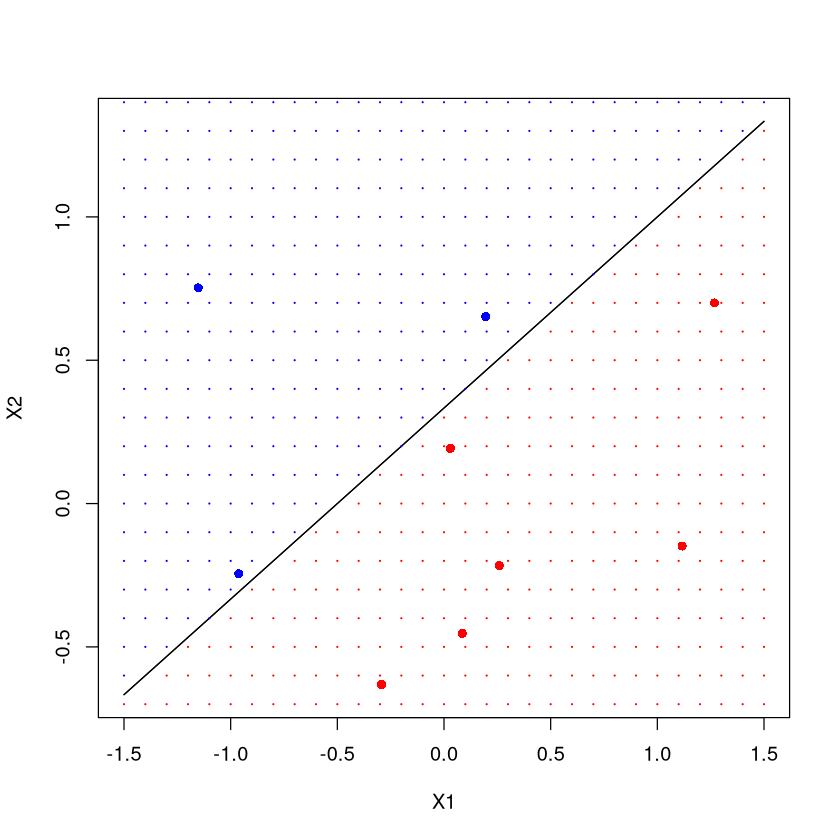

In [3]:
set.seed(3)
xn <- rnorm(10)
yn <- .5 + rnorm(10)
x <- seq(-1.5,1.5,by=.1)
hyper <- function(x) (1 + 2*x)/3
plot(x, hyper(x), type="l", xlab="X1", ylab="X2")
color.1 <- "red"
color.1[ yn > hyper(xn) ] <- "blue"
color.1[ yn < hyper(xn) ] <- "red"
points(xn, yn, pch=16, col=color.1)
lines(x, hyper(x), xlab="X1", ylab="X2")
X1 = c()
X2 = c()
for (x1 in x) {
    for (x2 in x) {
        X1 = c(X1, x1)
        X2 = c(X2, x2)
    }
}
color <- "red"
color[X2>hyper(X1)] <- "blue"
color[X2<hyper(X1)] <- "red"
points(X1, X2, col=color, cex=.1)
rm(list=ls())